# Data Analysis: Bank Full

## Dataset Explanation

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

Number of Instances: 45211 for bank-full.csv

Number of Attributes: 16 + output attribute.

## Explanation of Data Analysis

In conducting data analysis, data exploration will be carried out such as filling in null values and correcting data types, so that every feature explored will be clean from null values and each feature will have a data type that is in accordance with the data dictionary. Furthermore, Exploratory Data Analysis (EDA) was carried out to find information that could be obtained from data sets based on data groups.

## Feature Description

1. Input variables:
       1. age (numeric)
       2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                           "blue-collar","self-employed","retired","technician","services") 
       3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
       4. education (categorical: "unknown","secondary","primary","tertiary")
       5. default: has credit in default? (binary: "yes","no")
       6. balance: average yearly balance, in euros (numeric) 
       7. housing: has housing loan? (binary: "yes","no")
       8. loan: has personal loan? (binary: "yes","no")
       9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
       10. day: last contact day of the month (numeric)
       11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
       12. duration: last contact duration, in seconds (numeric)
       13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
       14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
       15. previous: number of contacts performed before this campaign and for this client (numeric)
       16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


2. Output variable (desired target):
       17. y: has the client subscribed a term deposit? (binary: "yes","no")

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

## Overview

Load the data data

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";")

Show first and last 5 data

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Show the data information

In [5]:
pd.DataFrame({'Features': df.columns,
              'dataType': df.dtypes.values,
              'nullvalues': [df[i].isna().sum() for i in df.columns],
              'unique': [df[i].nunique() for i in df.columns],
              'uniqueSample': [list(pd.Series(df[i].unique()))
                               for i in df.columns]}).reset_index(drop=True)

,Features,dataType,nullvalues,unique,uniqueSample
0,age,int64,0,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5..."
1,job,object,0,12,"[management, technician, entrepreneur, blue-co..."
2,marital,object,0,3,"[married, single, divorced]"
3,education,object,0,4,"[tertiary, secondary, unknown, primary]"
4,default,object,0,2,"[no, yes]"
5,balance,int64,0,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270..."
6,housing,object,0,2,"[yes, no]"
7,loan,object,0,2,"[no, yes]"
8,contact,object,0,3,"[unknown, cellular, telephone]"
9,day,int64,0,31,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21..."


In [6]:
df.shape

(45211, 17)

> There are 17 columns with 45211 data each column and no column has a null value.

## Data Preprocessing

This dataset has no null values and all columns have the correct data type according to the data dictionary. So at this stage only need to separate numeric and categorical data.

Eliminate the `day`, `month`, `contact`, and `poutcome` columns as they are considered to have no effect on the analysis.

In [7]:
df = df.drop(['day', 'month', 'contact', 'poutcome'], axis=1)

In [8]:
df_num = df.select_dtypes(['int64', 'float64'])
df_num['y'] = df['y']
df_num['y'] = df['y'].replace(['no', 'yes'], ['0', '1']).astype("int")
df_num.head()

,age,balance,duration,campaign,pdays,previous,y
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
3,47,1506,92,1,-1,0,0
4,33,1,198,1,-1,0,0


In [9]:
df_ctg = df.select_dtypes(['object'])
df_ctg.head()

,job,marital,education,default,housing,loan,y
0,management,married,tertiary,no,yes,no,no
1,technician,single,secondary,no,yes,no,no
2,entrepreneur,married,secondary,no,yes,yes,no
3,blue-collar,married,unknown,no,yes,no,no
4,unknown,single,unknown,no,no,no,no


Uses `describe()` to see the measure of central tendency, quartile, min, and max for each feature.

In [10]:
df_num.describe()

,age,balance,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Uses `describe()` to see unique (different categories), top (most data appears), and freq (frequently appearing data) values for categorical data.

In [11]:
df_ctg.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
y,45211,2,no,39922


## Exploratory Data Analysis (EDA)

Start this process by looking at the target feature first.

### Target Feature

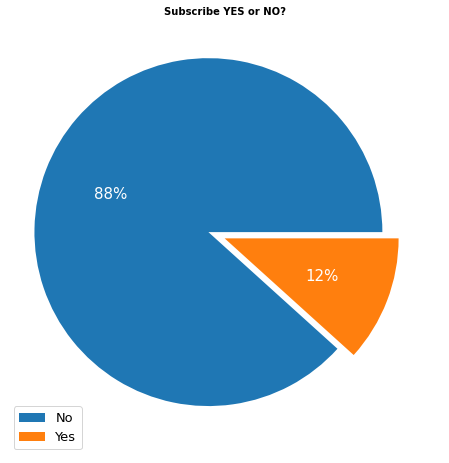

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Subscribe YES or NO?", size=10, fontweight='bold')
plt.pie(df['y'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

> There are 5289 (12%) clients has subscribed to a term deposit.

### Numerical Features

Create a correlation matrix to see the correlation between numerical features.

<AxesSubplot:>

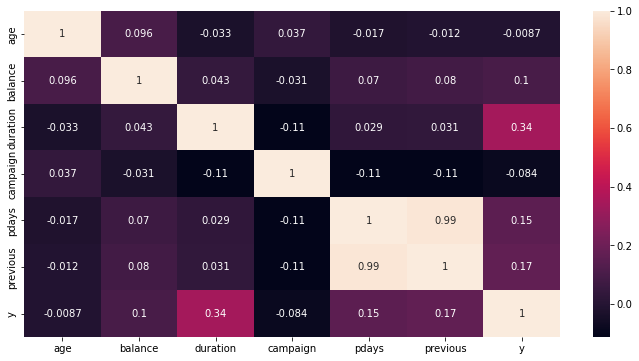

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_num.corr('spearman'), annot=True)

> From the correlation coefficient above, it can be seen that `pdays` has a correlation with `previous` of **0.99** which can be said to be a **very strong correlation**.

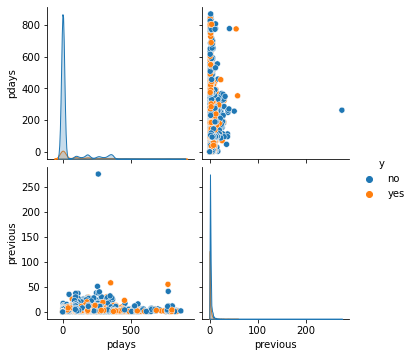

In [15]:
sns.pairplot(df[['pdays', 'previous', 'y']], hue="y")

> From the pairplot above, we cannot find a pattern of clients who subscribe to term deposits because the data is piled up in the same area.

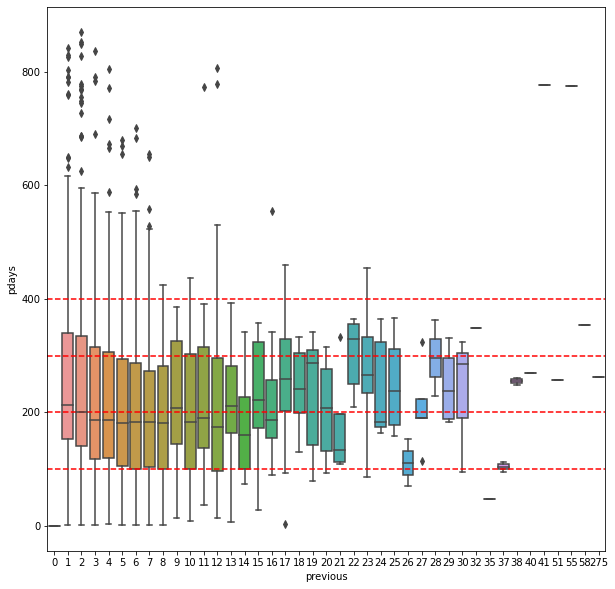

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df_num['pdays'],
            x=df_num['previous'])
reference = [100, 200, 300, 400]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

> From the boxplot above, it can be seen that the more contacts (`previous`) made to a client in the previous campaign, the more likely that client was contacted around 200-300 days ago (`pdays`). Whereas fewer contacts (`previous`) were made to a client in the previous campaign, then the client was last contacted 100-200 days ago (`pdays`). Perhaps this is because the bank already has records of clients who have previously subscribed to term deposits, so these clients will be contacted more often and faster to be given information about the latest term deposits.

Make Function for Visualize the Numeric Data

In [17]:
def visualize_data(column_name):
    subs = df[(df['y'] == 'yes')][column_name]
    not_subs = df[(df['y'] == 'no')][column_name]

    plt.figure(figsize=(12, 6))
    ax = sns.distplot(not_subs)
    ax = sns.distplot(subs)

    ax.legend(['No', 'Yes'])

    plt.xlabel(column_name, fontsize=12)
    plt.title('Distribution of Subscribed by ' + column_name, fontsize=22)
    plt.tight_layout()
    plt.show()

    print(f"Subscribed by {column_name}")
    print(subs.value_counts().head())
    print(f"Not Subscribed by {column_name}")
    print(not_subs.value_counts().head())

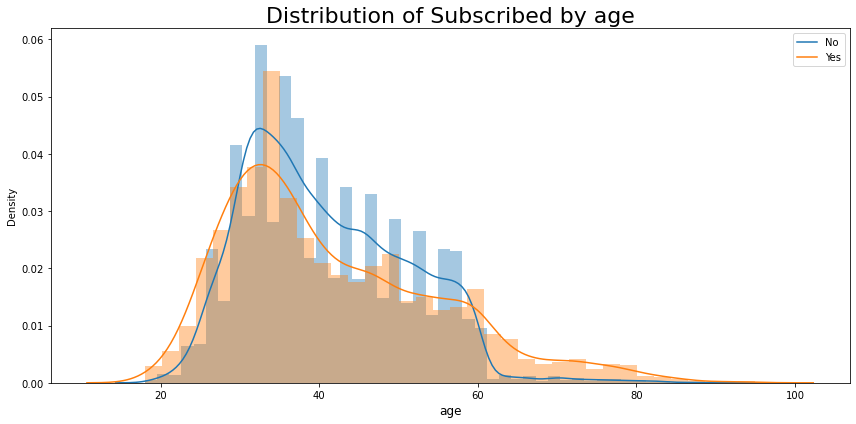

Subscribed by age
32    221
30    217
33    210
35    209
31    206
Name: age, dtype: int64
Not Subscribed by age
32    1864
31    1790
33    1762
34    1732
35    1685
Name: age, dtype: int64


In [18]:
visualize_data("age")

> From the data above, it can be seen that many of the clients who subscribe are clients aged between 31-35 years.

> Many clients who are over 60 years old will subscribe. This may be because they have entered retirement age and want to save their money so that they can continue to develop their retirement fund.

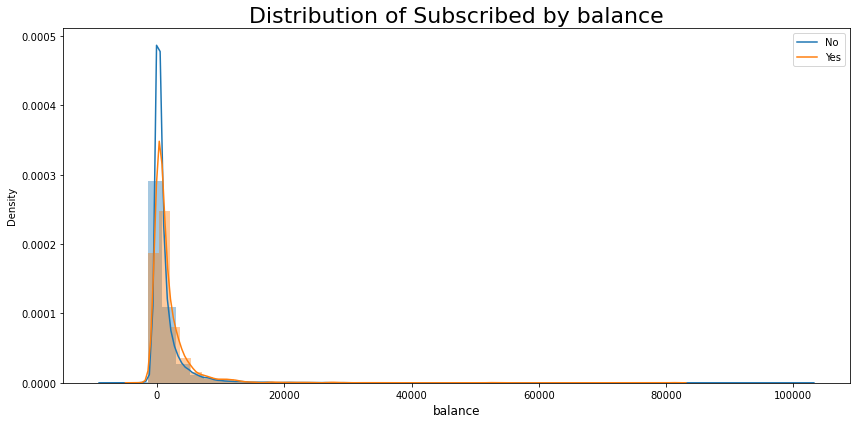

Subscribed by balance
0      292
1       17
2       16
5       15
294     12
Name: balance, dtype: int64
Not Subscribed by balance
0    3222
1     178
2     140
4     128
3     122
Name: balance, dtype: int64


In [19]:
visualize_data("balance")

> Balance does not really affect deposit subscriptions, but many of the clients who subscribe are clients who have an average balance of 0 euros per year.

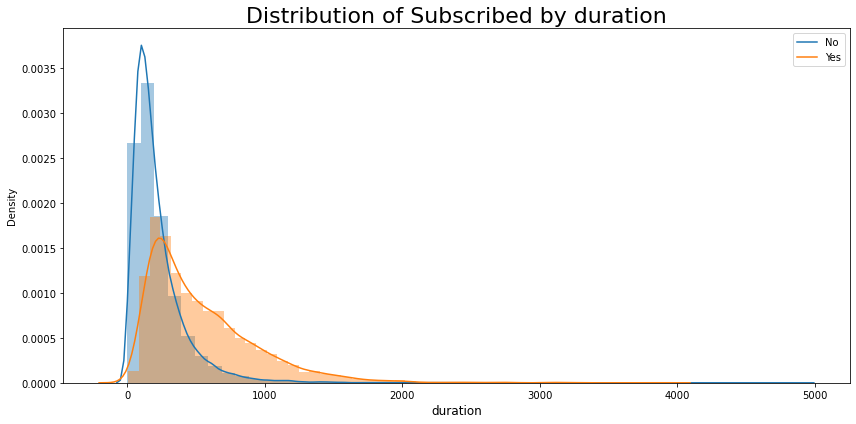

Subscribed by duration
261    19
226    17
229    16
232    16
187    16
Name: duration, dtype: int64
Not Subscribed by duration
124    182
90     181
114    171
89     170
104    169
Name: duration, dtype: int64


In [20]:
visualize_data("duration")

> The duration of communication between the bank and the client does not directly affect the client in subscribing to the deposit, but it can be seen that the longer they communicate, the longer the communication shows that the client is interested in this discussion, the higher the probability that the client will subscribe. Most clients will make a decision after communicating for approximately 3-4 minutes.

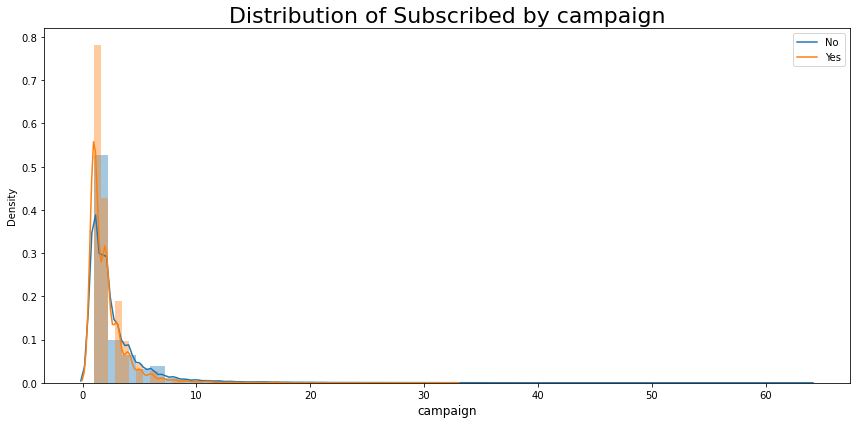

Subscribed by campaign
1    2561
2    1401
3     618
4     317
5     139
Name: campaign, dtype: int64
Not Subscribed by campaign
1    14983
2    11104
3     4903
4     3205
5     1625
Name: campaign, dtype: int64


In [21]:
visualize_data("campaign")

> Frequent contact with clients can affect clients in subscribing to deposits, it can be seen that the more often clients are contacted by the bank, the less chances of clients to subscribe. Therefore, when communicating first, it is the best step to provide desired and useful information to clients, so that clients are interested in subscribing.

### Categorical Data

Calculates the correlation on each feature.

In [22]:
# cramers untuk categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [23]:
corr = []
for i in df_ctg:
    matrix = []
    for j in df_ctg:
        matrix.append(cramersv(df_ctg[i], df_ctg[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index=df_ctg.columns, columns=df_ctg.columns)

<AxesSubplot:>

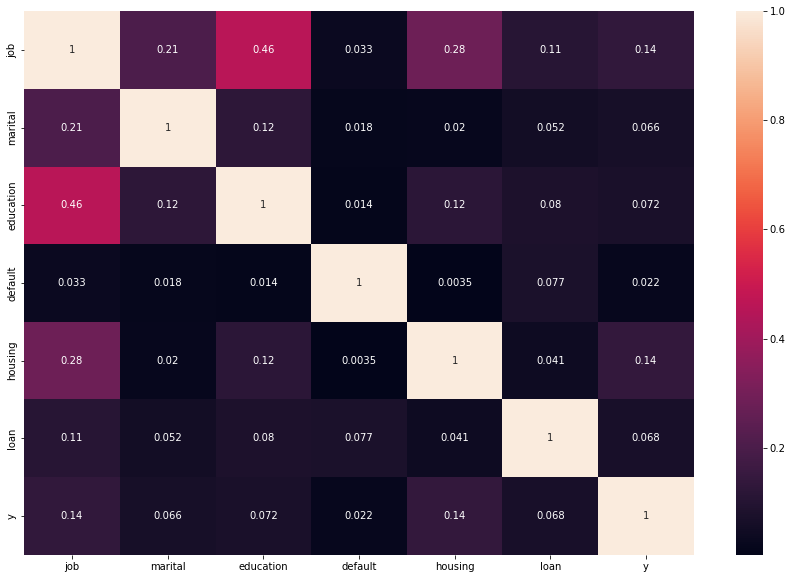

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_cat, annot=True)

> From the correlation coefficient, it can be seen that there is a correlation between `job` and `education` of **0.46** and can be categorized as a **medium level correlation**.

<AxesSubplot:xlabel='education', ylabel='job'>

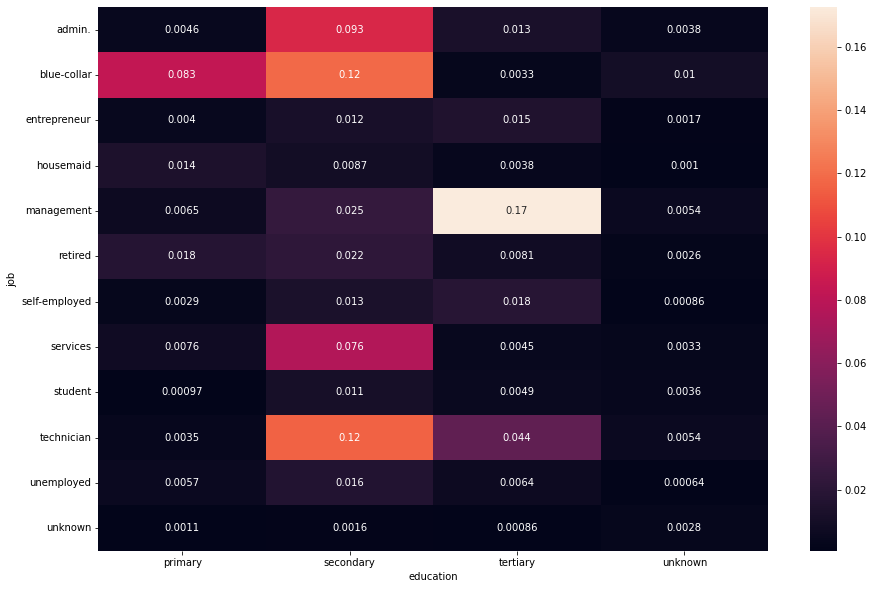

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(pd.crosstab(df_ctg['job'], df_ctg['education'], normalize=True),
            annot=True)

> From the crosstab function, it can be seen the distribution of client education with the work done by clients.
> 1. Primary: many clients work as blue-collar
> 2. Secondary: many clients work as blue-collar and technicial
> 3. Tertiary: many clients work as management

Make Function for Visualize the Numeric Data

In [26]:
corr_cat

,job,marital,education,default,housing,loan,y
job,1.000000,0.205425,0.458009,0.033036,0.281311,0.105354,0.135094
marital,0.205425,1.000000,0.121351,0.018044,0.019587,0.051510,0.065590
education,0.458009,0.121351,1.000000,0.013651,0.119062,0.079865,0.072238
default,0.033036,0.018044,0.013651,0.999375,0.003492,0.076865,0.021656
housing,0.281311,0.019587,0.119062,0.003492,0.999955,0.040994,0.139025
loan,0.105354,0.051510,0.079865,0.076865,0.040994,0.999918,0.067929
y,0.135094,0.065590,0.072238,0.021656,0.139025,0.067929,0.999893


In [27]:
def visualize_ctg_data(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=df_ctg, hue='y')
    plt.legend(loc='upper right', fontsize=13)
    plt.xlabel(i, fontsize=20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.crosstab(df_ctg[column_name], df_ctg['y'], normalize=True),
                annot=True)

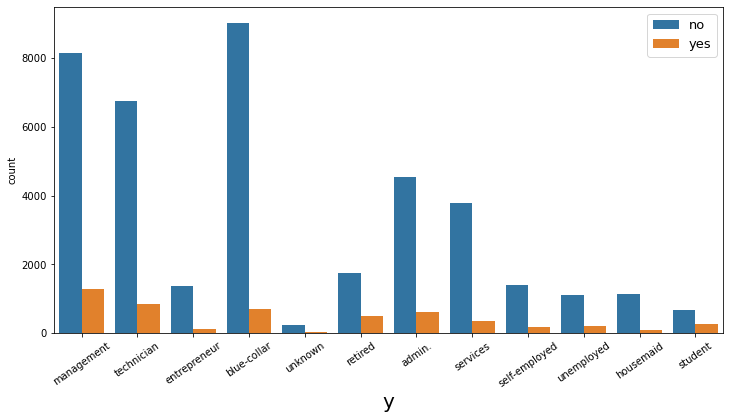

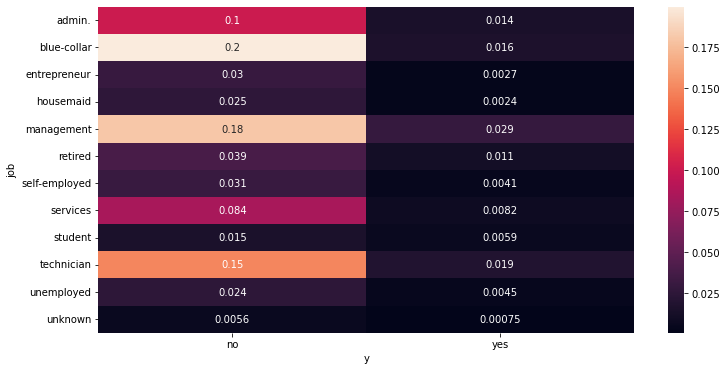

In [28]:
visualize_ctg_data("job")

> From this, it can be concluded that the clients who work as **blue-collar** are the clients who refuse the most (20%) and the clients who work as **management** want the most (2.9%) to subscribe.

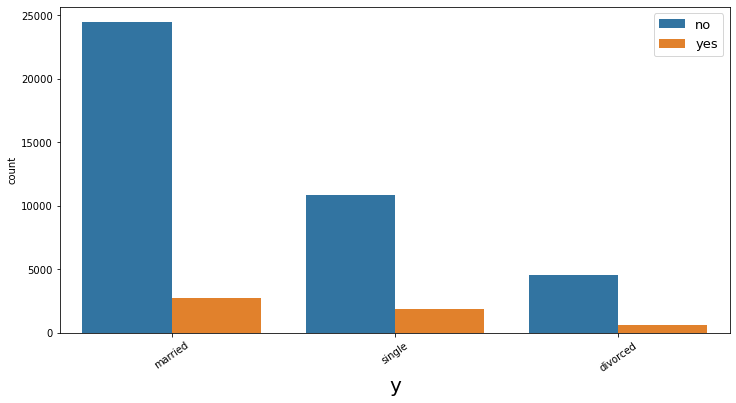

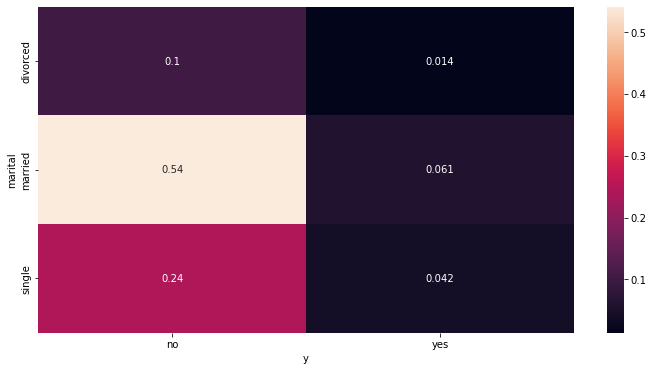

In [29]:
visualize_ctg_data("marital")

> From the data above, it can be seen that married clients are the clients who refuse the most (54%) and want the most (6.1%) to subscribe.

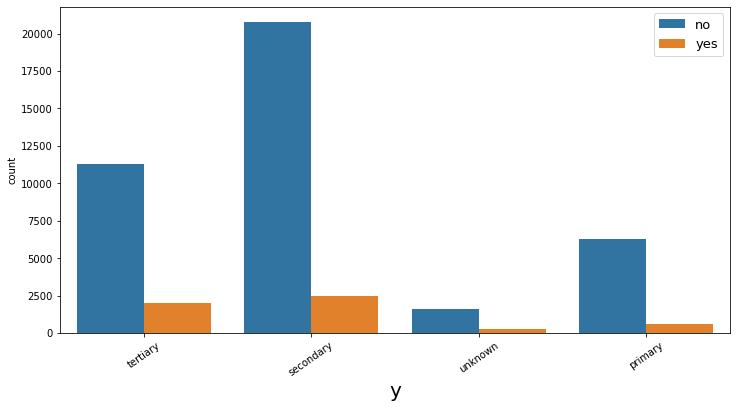

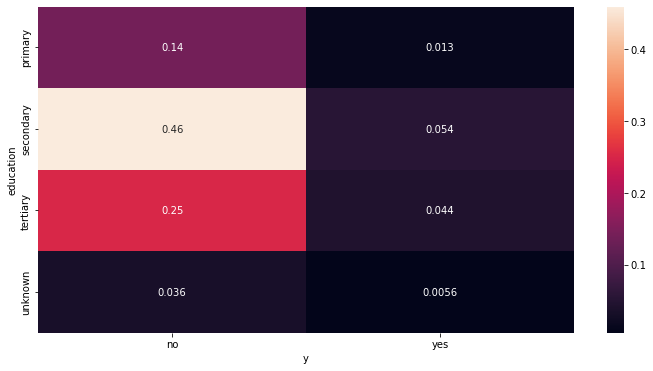

In [30]:
visualize_ctg_data("education")

> From the data above, it can be seen that clients who have secondary education are the clients who refuse the most (46%) and want the most (5.4%) to subscribe.

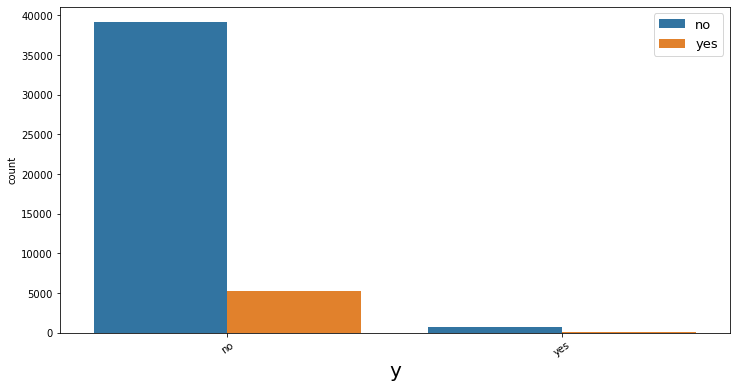

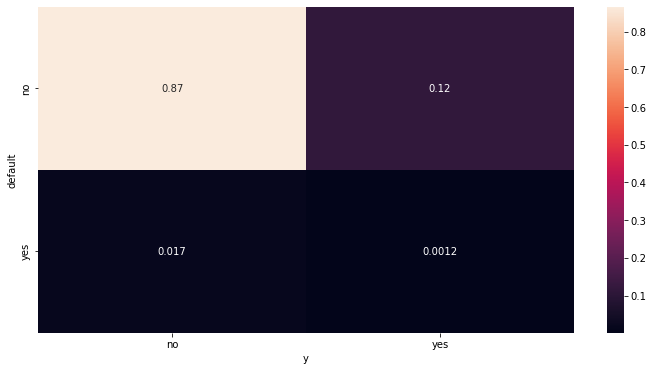

In [31]:
visualize_ctg_data("default")

> From the data above, it can be seen that clients who do not have credit are the clients who refuse the most (87%) and want the most (0.12%) to subscribe.

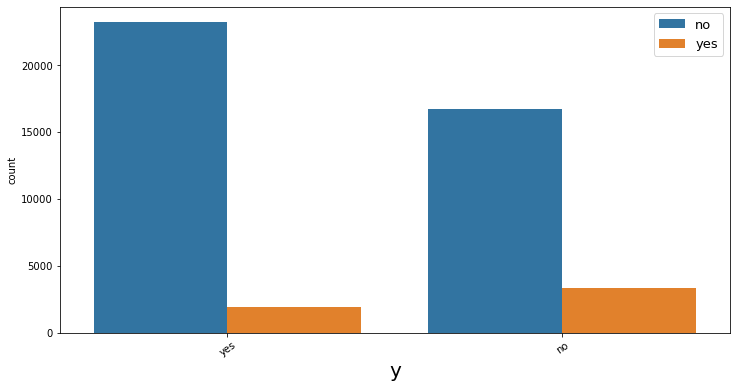

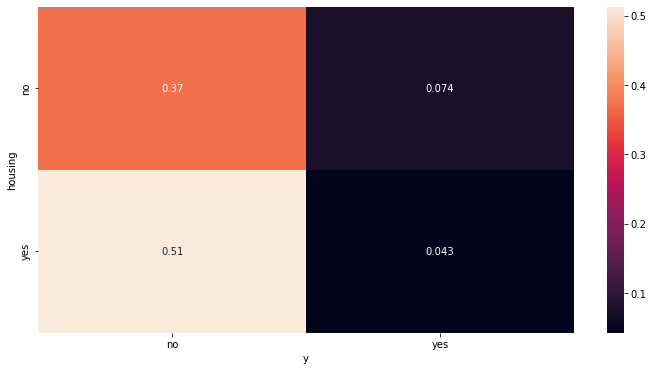

In [32]:
visualize_ctg_data("housing")

> From the data above, it can be seen that clients who have housing loans are the clients who refuse the most (51%), while those who want the most (7.4%) to subscribe are those who do not have housing loans.

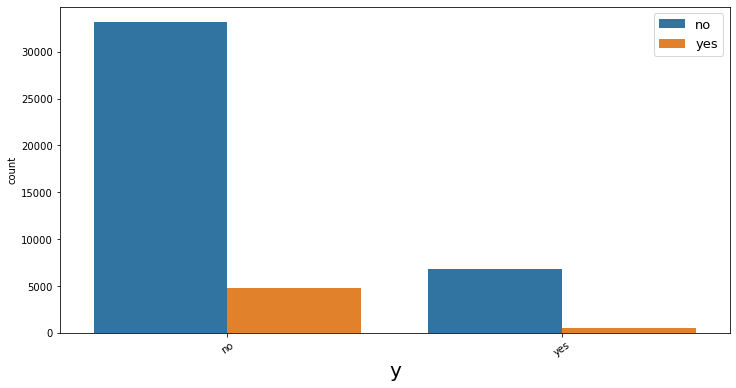

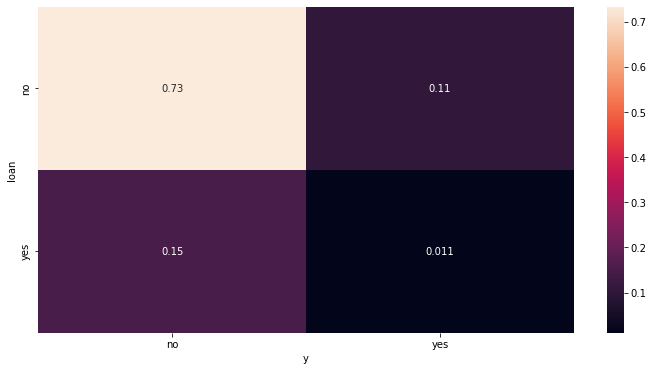

In [33]:
visualize_ctg_data("loan")

> From the data above, it can be seen that clients who do not have loans are the clients who refuse the most (73%) and want the most (1.1%) to subscribe.

## Summary

This dataset has a total of 45211 client data, as many as 39922 (88%) clients do not subscribe to deposits and as many as 5289 (12%) clients subscribe to deposits.

There is some information obtained from the results of numerical data analysis:
1. Clients who subscribe are clients aged between 31 - 35 years and clients who are over 60 years old can increase the chances of subscribing, this may be because they have entered retirement and want their money to continue to grow.
2. When the bank contacts a client and the communication lasts for more than 3 minutes, chances are that the client is interested and will subscribe.
3. The first contact with a client is the most important thing, because many clients subscribe when they are first contacted.

There is some information obtained from the results of categorical data analysis:
1. Clients who work as management are more likely to subscribe.
2. Clients who are married are more likely to decide to subscribe than clients who are single or divorced.
3. Clients who have secondary education will be more likely to subscribe.
4. When clients have loans, they are less likely to subscribe.